# Exaploratory Data Analysis (EDA)

Unlike hypothesis-driven analyses guided by prior domain knowledge, EDA is a flexible, open-ended exploration that allows data scientists to examine data without predefined assumptions. It serves as an initial step to uncover patterns, trends, and correlations that inspire hypothesis generation. Practically, EDA helps formulate data-driven hypotheses, which can then be tested alongside domain-based hypotheses, enhancing understanding and validating insights.

This notebook demonstrates a comprehensive examination of a sample dataset. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

###  Data Collection
Demonstrated on the [Ames Housing Dataset](https://www.kaggle.com/datasets/prevek18/ames-housing-dataset?select=AmesHousing.csv)
 obtained from [Kaggle](https://www.kaggle.com).

Since this notebook focuses on EDA, the entire dataset will be analyzed without splitting into train and validation sets.

In [2]:
df = pd.read_csv('AmesHousing.csv', index_col=0)
print(f"DataFrame:\n{'Rows:':<10}{df.shape[0]:<10}\n{'Columns:':<10}{df.shape[1]:<10}")
print(f"\t{'Object:':<10}{df.select_dtypes(include='object').shape[1]}")
print(f"\t{'Float64:':<10}{df.select_dtypes(include='float64').shape[1]}")
print(f"\t{'Int64:':<10}{df.select_dtypes(include='int64').shape[1]}")
display(df.head(5))

DataFrame:
Rows:     2930      
Columns:  81        
	Object:   43
	Float64:  11
	Int64:    27


,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Order,,,,,,,,,,,,,,,,,,,,,
1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Descriptive Statistics

#### Target feature
The predicted feature of this dataset is 'SalePrice'

In [3]:
output_col_name = 'SalePrice'
print(f'Column- {output_col_name} description:')
df[output_col_name].describe()

Column- SalePrice description:


count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

Histogram of SalesPrice

Text(0.5, 1.0, 'SalePrice Distribution')

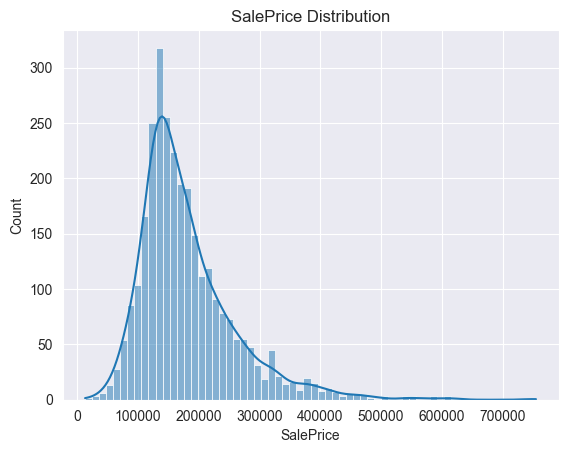

In [4]:
sns.histplot(df[output_col_name], kde=True)
plt.title(f'{output_col_name} Distribution')

SalePrice deviates from Normal distribution and is positively (right) skewed.

SalesPrice also shows "peakedness"

In [5]:
print(f"Skewness: {df[output_col_name].skew():.4f}")
print(f"Kurtosis: {df[output_col_name].kurt():.4f}")

Skewness: 1.7435
Kurtosis: 5.1189


#### Predictors

In [7]:
# Use this function to get a summary of a large DataFrame to simplify the examination of each feature

def summary(df: pd.DataFrame) -> pd.DataFrame:
    """Generate a comprehensive summary of a pandas DataFrame.

    Args:
        df (pd.DataFrame): DataFrame to be summarized.

    Returns:
        pd.DataFrame: 
    """
    summary = []
    for col_name in df.columns:
        col_dtype = df[col_name].dtype
        col_missing = df[col_name].isnull().sum()
        col_not_null = df[col_name].notnull().sum()
        col_unique = df[col_name].nunique()  # number of distinct values excluding NaN
        if col_unique <= 10:
            distinct_values = df[col_name].value_counts().to_dict()
        else:
            distinct_values = df[col_name].value_counts().head(10).to_dict()
        if np.issubdtype(df[col_name].dtype, np.number):
            col_min = df[col_name].min()
            col_max = df[col_name].max()
            col_mean = df[col_name].mean()
            col_std = df[col_name].std()
            col_median = df[col_name].median()
        else:
            col_min, col_max, col_mean, col_median, col_std = None, None, None, None, None
        summary.append({
            "column": col_name,
            "dtype": col_dtype,
            "missing": col_missing,
            "not_null": col_not_null,
            "unique": col_unique,
            "distinct_values": distinct_values,
            "min": col_min,
            "max": col_max,
            "mean": col_mean,
            "median": col_median,
            "std": col_std
        })
    return pd.DataFrame(summary)

A general use predictor table that can be used to get an overview of all predictors

In [8]:
summary_df = summary(df)
display(summary_df)

,column,dtype,missing,not_null,unique,distinct_values,min,max,mean,median,std
0,PID,int64,0,2930,2930,"{526301100: 1, 535375130: 1, 535378080: 1, 535...",526301100.0,1.007100e+09,7.144645e+08,535453620.0,1.887308e+08
1,MS SubClass,int64,0,2930,16,"{20: 1079, 60: 575, 50: 287, 120: 192, 30: 139...",20.0,1.900000e+02,5.738737e+01,50.0,4.263802e+01
2,MS Zoning,object,0,2930,7,"{'RL': 2273, 'RM': 462, 'FV': 139, 'RH': 27, '...",NaN,NaN,NaN,NaN,NaN
3,Lot Frontage,float64,490,2440,128,"{60.0: 276, 80.0: 137, 70.0: 133, 50.0: 117, 7...",21.0,3.130000e+02,6.922459e+01,68.0,2.336533e+01
4,Lot Area,int64,0,2930,1960,"{9600: 44, 7200: 43, 6000: 34, 9000: 29, 10800...",1300.0,2.152450e+05,1.014792e+04,9436.5,7.880018e+03
...,...,...,...,...,...,...,...,...,...,...,...
76,Mo Sold,int64,0,2930,12,"{6: 505, 7: 449, 5: 395, 4: 279, 8: 233, 3: 23...",1.0,1.200000e+01,6.216041e+00,6.0,2.714492e+00
77,Yr Sold,int64,0,2930,5,"{2007: 694, 2009: 648, 2006: 625, 2008: 622, 2...",2006.0,2.010000e+03,2.007790e+03,2008.0,1.316613e+00
78,Sale Type,object,0,2930,10,"{'WD ': 2536, 'New': 239, 'COD': 87, 'ConLD': ...",NaN,NaN,NaN,NaN,NaN
79,Sale Condition,object,0,2930,6,"{'Normal': 2413, 'Partial': 245, 'Abnorml': 19...",NaN,NaN,NaN,NaN,NaN


There are three types of features to consider:

1. Categorical/Ordinal predictors: These are features that have a dtype of 'object' and numerical features with less than 10 unique values
2. Numerical predictors: These are features that have a dtype of 'int64' and 'float64' with more than 10 unique values
3. Non-predictive features: These are features which are irrelevant like PID

In [9]:
non_predictive = ['PID', 'SalePrice']
all_numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols = [col for col in all_numerical_cols if df[col].nunique() >= 5 and col not in non_predictive]

category_cols = df.select_dtypes(include=['object']).columns.tolist() + [col for col in all_numerical_cols if df[col].nunique() < 5]
print(f"Numerical cols:\n{numerical_cols}\nCategorical cols:\n{category_cols}")

Numerical cols:
['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Full Bath', 'Bedroom AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']
Categorical cols:
['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage

#### Relationship of numerical features to target feature

In [10]:
# Correlation of numerical parameters to the target feature
corr_series = df.loc[:, numerical_cols +['SalePrice']].corr()['SalePrice'].sort_values(key=lambda x: abs(x), ascending=False)
display(corr_series)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Enclosed Porch    -0.128787
Screen Porch       0.112151
Overall Cond      -0.101697
MS SubClass       -0.085092
Pool Area          0.068403
Low Qual Fin SF   -0.037660
Mo Sold            0.035259
3Ssn Porch         0.032225
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
Name: SalePrice, dtype: float64

In [ ]:
# most popular neighborhoods

#

The top **SalePrice** correlated features are:
1. Overall Qual
2. Gr Liv Area
3. Garage Cars
4. Garage Area
5. Total Bsmt SF


Visualizing the top two most correlated numerical features to **SalePrice**

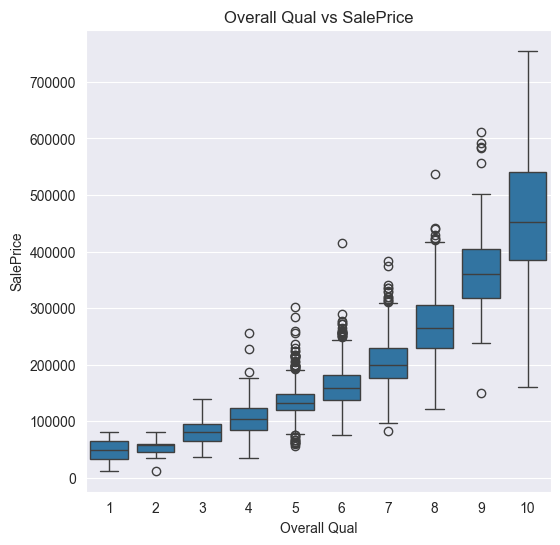

In [11]:
fig, axs = plt.subplots(figsize=(6,6))
sns.boxplot(x='Overall Qual', y='SalePrice', data=df, ax=axs)
plt.title('Overall Qual vs SalePrice')
plt.xlabel('Overall Qual')
plt.ylabel('SalePrice')
plt.show()

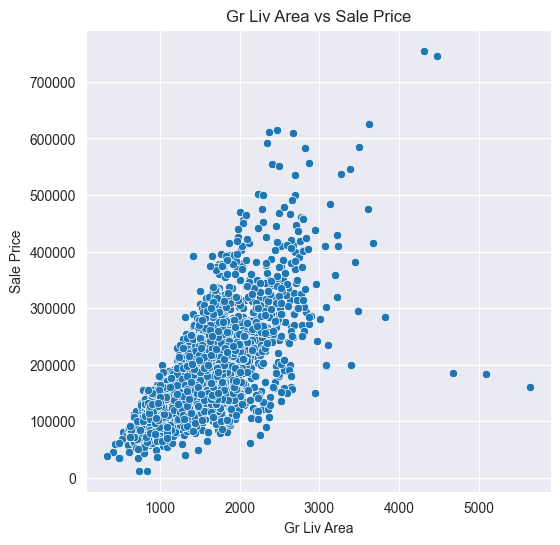

In [12]:
fig, axs = plt.subplots(figsize=(6,6))
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df, ax=axs)
plt.title('Gr Liv Area vs Sale Price')
plt.xlabel('Gr Liv Area')
plt.ylabel('Sale Price')
plt.show()

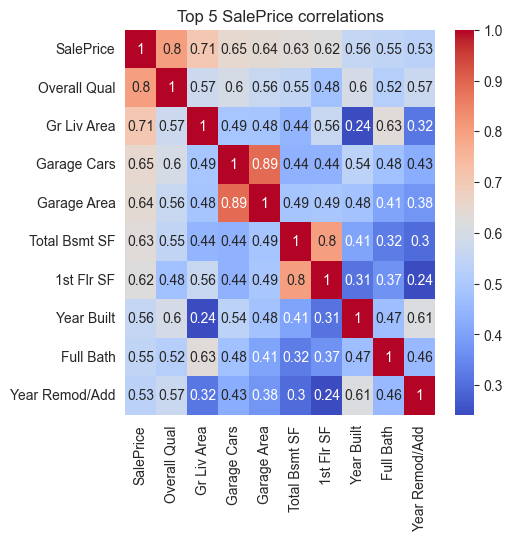

In [13]:
top_5_saleprice_corrs = corr_series.index[:10].to_list()
fix, axs = plt.subplots(figsize=(5,5))
sns.heatmap(data=df.loc[:, top_5_saleprice_corrs].corr(), 
            annot=True,
            cmap='coolwarm', ax=axs)
plt.title('Top 5 SalePrice correlations')
plt.show()

1. **Garage Cars** and **Garage Area** are highly correlated. **Garage Cars** has a higher correlation to **SalePrice**
2. **Total Bsmt SF** and **1st Flr SF** are highly correlated. **Total Bsmt SF** has a slighly higher correlation to **SalePrice**

A pairplot is simmilar to a correlation heatmap

/Users/aviadbaram/Projects/portfolio/.venv/lib/python3.13/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


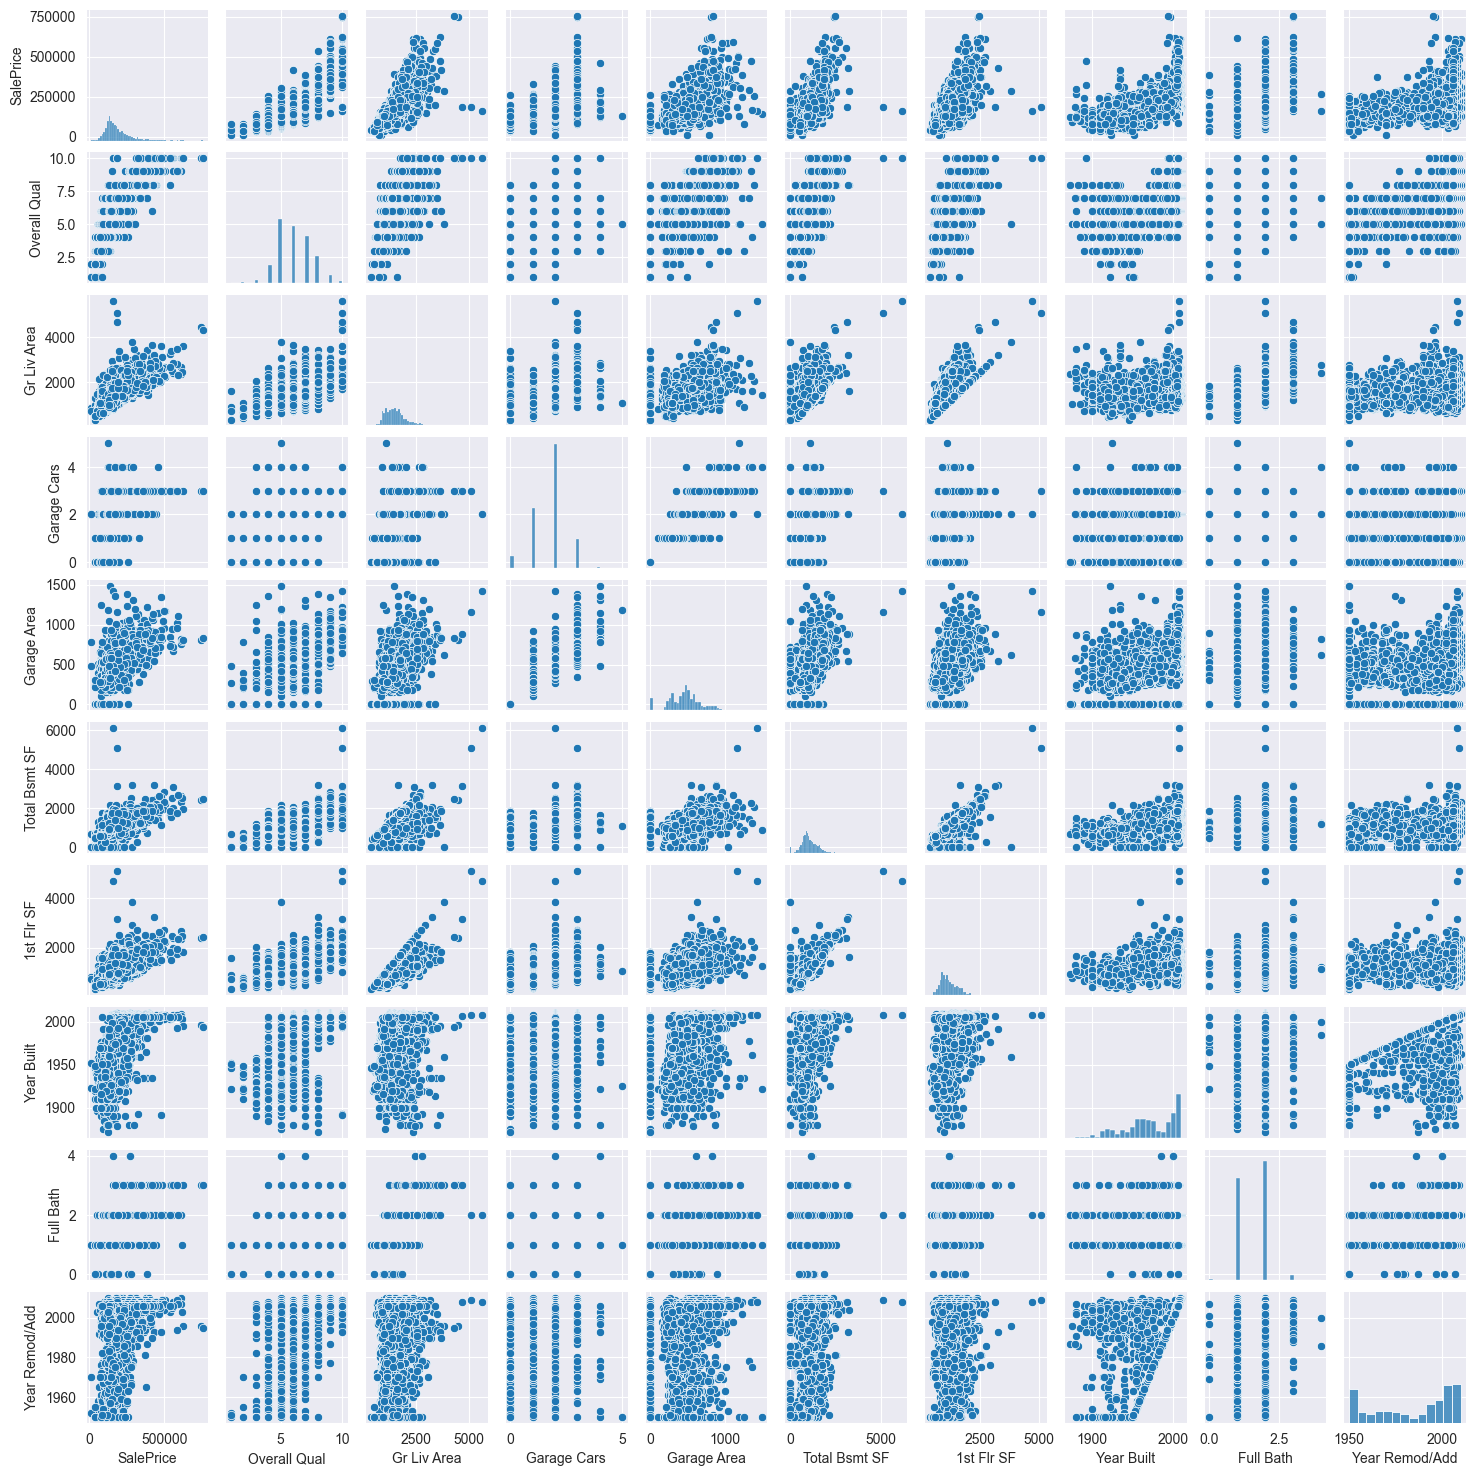

In [14]:
sns.pairplot(df[top_5_saleprice_corrs], size=1.5)
plt.show()

#### Correlation

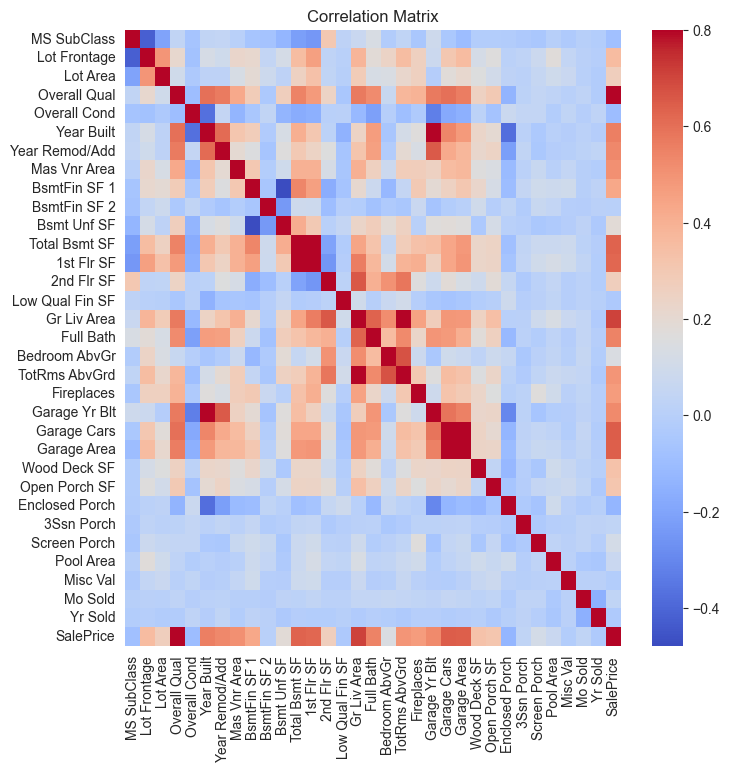

In [15]:
corr_matrix = df.loc[:, numerical_cols +['SalePrice']].corr()
fig, axes = plt.subplots(figsize=(8,8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmax=0.8, ax=axes)
plt.title('Correlation Matrix')
plt.show()

Multicollinearity between:
1. 'Total Bsmnt SF' and '1st Flr SF'
2. 'Garage Yr Blt' and 'Year Built'
3. 'Garage Area' and 'Garage Cars' 

### Handling Missing Data

Get a list of all columns with missing values


In [16]:
feature_nulls = df.isnull().sum()
nulls_df = pd.DataFrame(feature_nulls[feature_nulls > 0].sort_values(ascending=False), columns = ['null #'])
nulls_df['percent nulls'] =  round(100 * nulls_df['null #']/len(df.index), 2)
display(nulls_df)



,null #,percent nulls
Pool QC,2917,99.56
Misc Feature,2824,96.38
Alley,2732,93.24
Fence,2358,80.48
Mas Vnr Type,1775,60.58
Fireplace Qu,1422,48.53
Lot Frontage,490,16.72
Garage Cond,159,5.43
Garage Qual,159,5.43
Garage Finish,159,5.43


1. Discard feature with more than 20% missing

In [27]:
test = df.drop(columns=nulls_df[nulls_df['percent nulls'] >= 80].index, inplace=False)

### Feature Engineering

Inspect most important features for compliance with multi variate techniques

In [19]:
import scipy.stats as stats
# function to draw a normal distribution plot overlayed on the histogram
def plot_normal(ax, mean, std, color='black'):
    x = np.linspace(mean - 4*std, mean + 4*std, 1000)
    y = stats.norm.pdf(x, mean, std)
    sns.lineplot(x=x, y=y, color=color, linewidth=2, ax=ax)

((array([-3.49555212, -3.25141499, -3.11638513, ...,  3.11638513,
          3.25141499,  3.49555212], shape=(2930,)),
  array([ 9.45641889,  9.48044384, 10.46027076, ..., 13.34550853,
         13.52114084, 13.53447435], shape=(2930,))),
 (np.float64(0.4049184389480853),
  np.float64(12.020975245392641),
  np.float64(0.9925612613420498)))

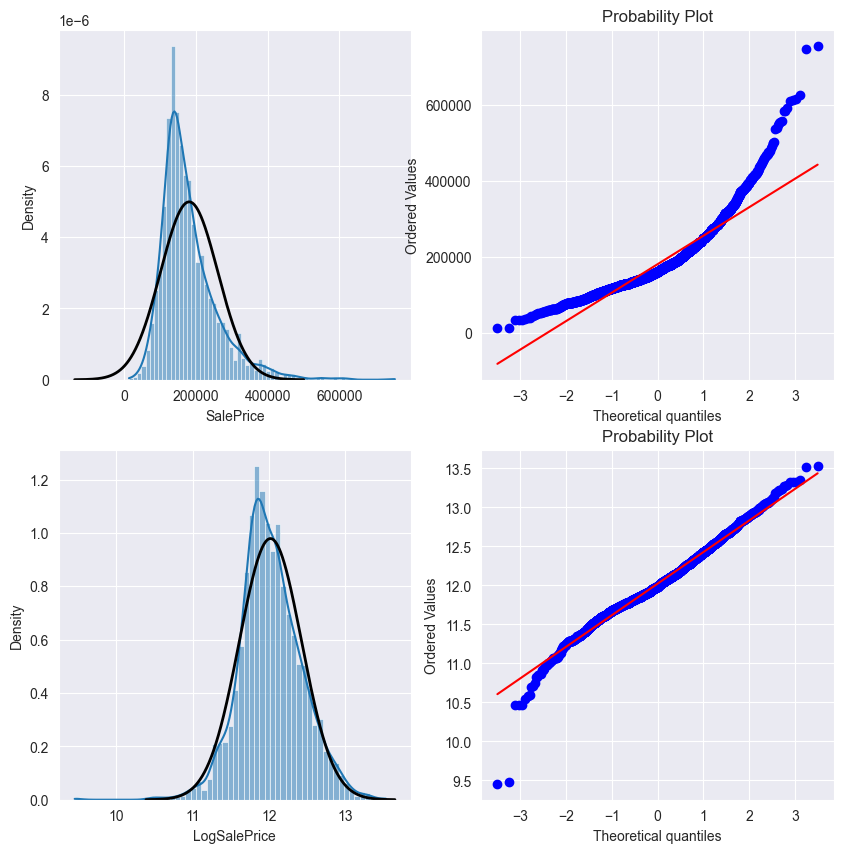

In [26]:
# normality of SalePrice
fig, axs = plt.subplots(2, 2, figsize=(10,10))
sns.histplot(df['SalePrice'], stat='density', kde=True, ax=axs[0][0])
plot_normal(axs[0][0], df['SalePrice'].mean(), df['SalePrice'].std())
stats.probplot(df['SalePrice'], plot=axs[0][1])
df['LogSalePrice'] = np.log(df['SalePrice'] + 1) 
sns.histplot(df['LogSalePrice'], stat='density', kde=True, ax=axs[1][0])
plot_normal(axs[1][0], df['LogSalePrice'].mean(), df['LogSalePrice'].std())
stats.probplot(df['LogSalePrice'], plot=axs[1][1])

**SalePrice** is not normally distributed; it is right-skewed. Applying a log transformation can correct this skewness, which improves the accuracy of regression models.



#### Numerical Columns
Null values in numerical columns that indicate a feature potentially irrelevant to a listing (e.g., Garage Size) and do not contain any listing with a value of 0.0 are assumed to be irrelevant for those listings and are replaced with 0.

Any listings still containing a null numerical features following this step are dropped 

Null values in categorical columns that indicate a feature potentially irrelevant to a listing (e.g., Garage Type) are replaced with 'NA'

### Outliers

### Univariate Analysis

### correlation with target

2) Data Cleaning and Preprocessing
3) Descriptive Statistics
4) Univariate Analysis
5) Bivariate Analysis
6) Multivariate Analysis
7) Feature Engineering
8) Visualization

### **EDA Checklist for Portfolio Project (Ames Housing Dataset)**  

#### **1️⃣ Data Loading & Overview**  
✅ Load dataset (`pd.read_csv()`)  
✅ Check shape (`df.shape`)  
✅ Display first few rows (`df.head()`)  
✅ Get column data types (`df.info()`)  

#### **2️⃣ Handling Missing Data**  
✅ Count missing values (`df.isnull().sum()`)  
✅ Visualize missing data (`sns.heatmap(df.isnull(), cbar=False)`)  
✅ Decide on imputation strategies (mean, median, mode, or drop)  

#### **3️⃣ Summary Statistics & Distributions**  
✅ Generate descriptive stats (`df.describe()`)  
✅ Check categorical value counts (`df['column'].value_counts()`)  
✅ Visualize distributions (histograms, KDE plots, boxplots)  
  ```python
  sns.histplot(df['SalePrice'], bins=50, kde=True)
  ```  
✅ Detect skewness & transform if needed (`df.skew()`)  

#### **4️⃣ Outlier Detection & Handling**  
✅ Use **boxplots** to find extreme values  
  ```python
  sns.boxplot(x=df['SalePrice'])
  ```  
✅ Use **IQR method** to filter outliers  
✅ Consider **log transformation** if necessary  

#### **5️⃣ Feature Relationships & Correlations**  
✅ Compute correlation matrix (`df.corr()`)  
✅ **Heatmap** of correlations  
  ```python
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
  ```  
✅ **Pairplot** of key numerical variables  
  ```python
  sns.pairplot(df[['SalePrice', 'GrLivArea', 'TotalBsmtSF']])
  ```  
✅ **Categorical vs. Numerical** comparisons (bar plots, boxplots)  
  ```python
  sns.boxplot(x='OverallQual', y='SalePrice', data=df)
  ```  

#### **6️⃣ Feature Engineering & Transformation**  
✅ Convert categorical variables (`pd.get_dummies()`, `LabelEncoder`)  
✅ Create new features (e.g., **TotalSF = GrLivArea + TotalBsmtSF**)  
✅ Standardize or normalize data (`MinMaxScaler`, `StandardScaler`)  

#### **7️⃣ Insights & Conclusion**  
✅ Summarize key findings (price trends, influential features)  
✅ Save cleaned dataset for modeling (`df.to_csv('cleaned_data.csv', index=False)`)  

---

Would you like me to help structure a **notebook template** for this? 🚀